In [5]:
import nltk

In [5]:
nltk.download()

[nltk_data] Error loading SMSSpamCollection: Package
[nltk_data]     'SMSSpamCollection' not found in index


False

In [8]:
messages = [line.rstrip() for line in open('D:/Data Science/Python/smsspamcollection/SMSSpamCollection', encoding="utf8")]

In [9]:
len(messages)

5574

In [12]:
for num, message in enumerate(messages[:10]):
    print(num, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [13]:
import pandas as pd

In [14]:
messages = pd.read_csv('D:/Data Science/Python/smsspamcollection/SMSSpamCollection', encoding="utf8",
                       sep ='\t', names = ['labels', 'messages'])

In [15]:
messages.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
messages.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels      5572 non-null object
messages    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [19]:
messages.groupby('labels').describe()

messages                                                               
          count unique                                                top freq
labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [21]:
messages['length'] = messages['messages'].apply(len)

In [22]:
messages.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

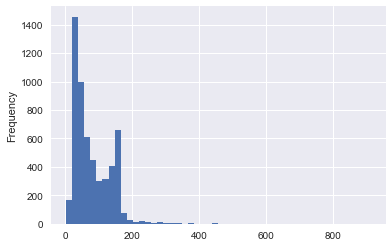

In [26]:
messages['length'].plot(bins=50, kind = 'hist')

In [27]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [29]:
messages[messages['length'] == 910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAFD748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DBBBBA8>], dtype=object)

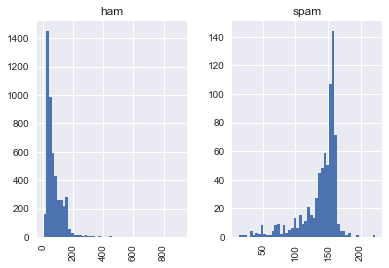

In [32]:
messages.hist(column = 'length', by = 'labels', bins = 50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DFC5B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E106DD8>], dtype=object)

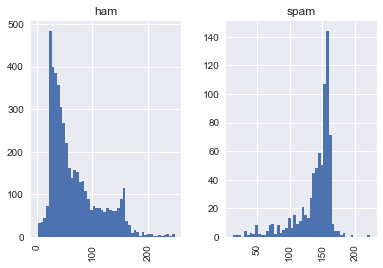

In [38]:
messages[messages['length'] < 250].hist(column = ['length'],bins = 50, by = 'labels')

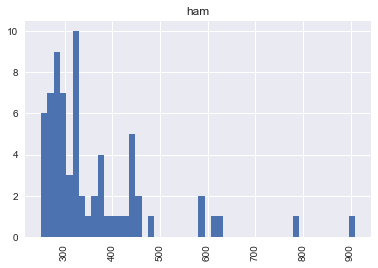

In [39]:
messages[messages['length'] > 250].hist(column = ['length'],bins = 50, by = 'labels')

In [40]:
import string

In [41]:
mess = 'Sample message! Notice: it has punctuation'

In [43]:
nopunc = [char for char in mess if char not in string.punctuation]

In [45]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [46]:
from nltk.corpus import stopwords

In [57]:
nltk.download('stopwords')
stopwords.words('english')[0:15]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\МАСЯНЯ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [59]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [60]:
clean_mess = [word for word in nopunc.split() if word.lower()
              not in stopwords.words('english') ]

In [61]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [63]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
#Here is the original DataFrame again:

In [66]:
messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [67]:
from sklearn.feature_extraction.text import CountVectorizer


In [68]:
bow_transformer = CountVectorizer(analyzer = text_process)

In [69]:
bow_transformer.fit(messages['messages'])

CountVectorizer(analyzer=<function text_process at 0x000000000E3462F0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [70]:
message4 = messages['messages'][3]
message4

'U dun say so early hor... U c already then say...'

In [72]:
bow4 = bow_transformer.transform([message4])

In [74]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [78]:
bow_transformer.get_feature_names()[6222]

'early'

In [103]:
messages_bow = bow_transformer.transform(messages['messages'])


In [104]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [84]:
from sklearn.feature_extraction.text import TfidfTransformer

In [105]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)

In [106]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [107]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.28005242674


In [108]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [109]:
print(messages_tfidf.shape)

(5572, 11425)


In [96]:
from sklearn.naive_bayes import MultinomialNB

In [110]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [114]:
print('Predicted:', spam_detect_model.predict(tfidf4[0]))
print("Expected:", messages['labels'][3])

Predicted: ['ham']
Expected: ham


In [115]:
all_predictions = spam_detect_model.predict(messages_tfidf)

In [116]:
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [118]:
from sklearn.metrics import classification_report
print(classification_report(messages['labels'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [122]:
from sklearn.cross_validation import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['messages'], messages['labels'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [123]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [125]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000E3462F0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [126]:
predictions = pipeline.predict(msg_test)

In [128]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.97      1011
       spam       0.67      1.00      0.80       104

avg / total       0.97      0.95      0.96      1115

